<a href="https://colab.research.google.com/github/kashif1903/Stock-Trend-Prediction/blob/main/Stock_trend__prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as data

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 6.6 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=6468d02fc08526aeea46febf75284930590fcf8bd833c1c53e7a682cc0b5e365
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yfin
yfin.pdr_override()

In [ ]:
start_date = '2010-01-01'
end_date = '2019-12-31'
df = data.get_data_yahoo("AAPL", start= start_date, end= end_date)
df.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500339,447610800


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,70.062904,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,70.129517,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,71.520905,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,71.493759,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.918083,144114400


In [ ]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500339,447610800


In [ ]:
df=df.drop(['Date','Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


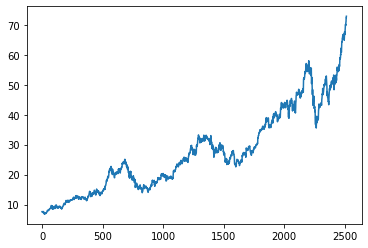

In [ ]:
plt.plot(df.Close)

In [ ]:
ma100= df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

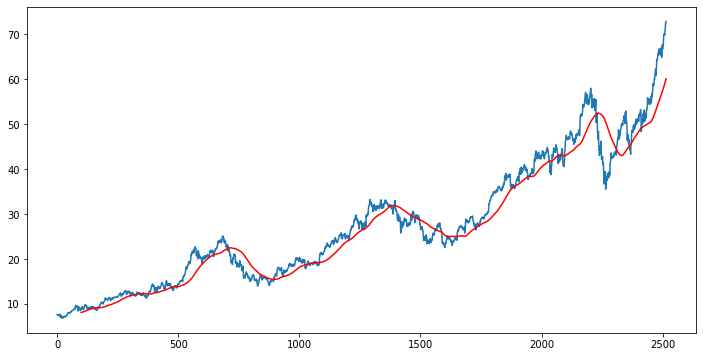

In [ ]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [ ]:
ma200= df.Close.rolling(200).mean()
ma200


0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

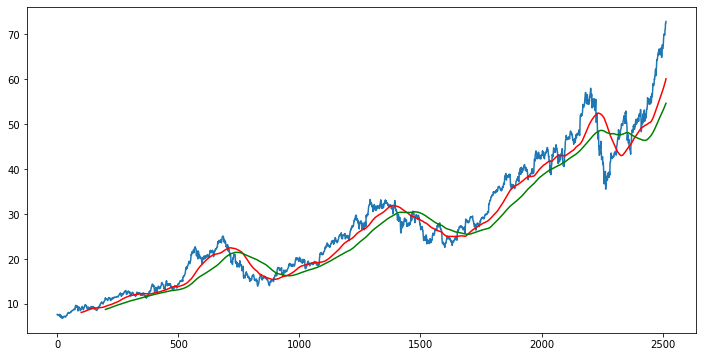

In [ ]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200, 'g')

In [ ]:
df.shape

(2515, 5)

In [ ]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_test.shape)

(1760, 1)
(755, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [ ]:
X_train = []
Y_train = []
for i in range(100,data_training_array.shape[0]):
  X_train.append(data_training_array[i-100: i])
  Y_train.append(data_training_array[i, 0])

X_train,Y_train= np.array(X_train), np.array(Y_train)


In [ ]:
# LSTM Model

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model=Sequential()
model.add(LSTM(units= 50, activation='relu', return_sequences= True, input_shape= (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60 , activation='relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units= 80, activation='relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train,Y_train, epochs= 50)

Epoch 1/50
52/52 [==============================] - 19s 272ms/step - loss: 0.0665
Epoch 2/50
52/52 [==============================] - 14s 269ms/step - loss: 0.0142
Epoch 3/50
52/52 [==============================] - 14s 269ms/step - loss: 0.0120
Epoch 4/50
52/52 [==============================] - 14s 270ms/step - loss: 0.0095
Epoch 5/50
52/52 [==============================] - 14s 270ms/step - loss: 0.0096
Epoch 6/50
52/52 [==============================] - 14s 276ms/step - loss: 0.0102
Epoch 7/50
52/52 [==============================] - 14s 277ms/step - loss: 0.0087
Epoch 8/50
52/52 [==============================] - 14s 275ms/step - loss: 0.0078
Epoch 9/50
52/52 [==============================] - 14s 271ms/step - loss: 0.0076
Epoch 10/50
52/52 [==============================] - 14s 271ms/step - loss: 0.0077
Epoch 11/50
52/52 [==============================] - 14s 269ms/step - loss: 0.0071
Epoch 12/50
52/52 [==============================] - 14s 268ms/step - loss: 0.0078
Epoch 13/50
5

In [ ]:
model.save('keras_model.h5')

In [ ]:
data_test.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [ ]:
#in order to predict 1760 value we need last 100 values in data_training

In [ ]:
past_100_days= data_training.tail(100)

In [ ]:
final_test= past_100_days.append(data_test, ignore_index= True)

In [ ]:
final_test.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [ ]:
input_data= scaler.fit_transform(final_test)
input_data.shape

(855, 1)

In [ ]:
X_test=[]
Y_test=[]
for i in range(100,input_data.shape[0]):
  X_test.append(input_data[i-100: i])
  Y_test.append(input_data[i, 0])
X_test, Y_test= np.array(X_test), np.array(Y_test)
print(X_test.shape)
print(Y_test.shape) 

(755, 100, 1)
(755,)


In [ ]:
#predictions
y_predicted= model.predict(X_test)

In [ ]:
y_predicted.shape

(755, 1)

In [ ]:
#scale up y_tst and y_predicted

In [ ]:
scaler.scale_

array([0.02123255])

In [ ]:
scale_factor= 1/0.02123255
y_predicted=y_predicted* scale_factor
Y_test=Y_test* scale_factor

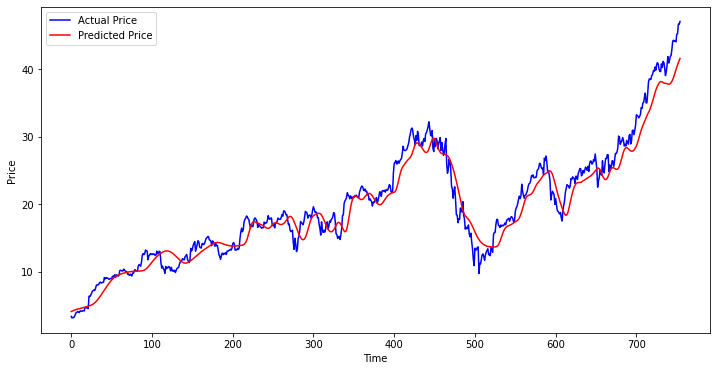

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(Y_test, 'b', label='Actual Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# New section